Importar librerias

# Sección nueva

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Carga de datos

In [4]:
datos = pd.read_csv(r'C:\Users\Sistemas 5\Desktop\Data\regresión.csv')

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duracion  170 non-null    float64
 1   paginas   170 non-null    int64  
 2   acciones  170 non-null    int64  
 3   valor     170 non-null    int64  
 4   clase     170 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.8 KB


In [6]:
datos.describe(). T

,count,mean,std,min,25%,50%,75%,max
duracion,170.0,111.075729,202.453200,1.0,11.0,13.0,108.0,898.0
paginas,170.0,2.041176,1.500911,1.0,1.0,2.0,2.0,9.0
acciones,170.0,8.723529,9.136054,1.0,3.0,6.0,10.0,63.0
valor,170.0,32.676471,44.751993,1.0,8.0,20.0,36.0,378.0
clase,170.0,0.752941,0.841327,0.0,0.0,0.0,2.0,2.0


In [7]:
print(datos.isnull().sum)

<bound method DataFrame.sum of      duracion  paginas  acciones  valor  clase
0       False    False     False  False  False
1       False    False     False  False  False
2       False    False     False  False  False
3       False    False     False  False  False
4       False    False     False  False  False
..        ...      ...       ...    ...    ...
165     False    False     False  False  False
166     False    False     False  False  False
167     False    False     False  False  False
168     False    False     False  False  False
169     False    False     False  False  False

[170 rows x 5 columns]>


In [8]:
datos[datos.duplicated()]

,duracion,paginas,acciones,valor,clase
106,12.0,1,6,24,1
108,12.0,1,6,24,1
113,12.0,1,2,2,2
115,12.0,1,3,6,2
118,12.0,1,3,3,2
120,11.0,1,3,6,2
121,12.0,1,3,6,2
122,12.0,1,2,2,2
123,12.0,1,3,3,2
124,11.0,1,3,3,2


In [9]:
#borrar archivo duplicados

datos.drop_duplicates(inplace=True)
datos


,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
...,...,...,...,...,...
165,13.0,1,7,42,0
166,12.0,1,2,6,0
167,13.0,1,3,9,0
168,13.0,1,7,28,0


# Sección nueva

**Importar bibliotecas**

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


Cargar el dataset

In [12]:
# Leer el archivo CSV
data = pd.read_csv('regresión.csv')

# Mostrar las primeras filas del dataset
print(data.head())


   duracion  paginas  acciones  valor  clase
0       7.0        2         4      8      2
1      21.0        2         6      6      2
2      57.0        2         4      4      2
3     101.0        3         6     12      2
4     109.0        2         6     12      2


Explorar y preparar los datos

In [14]:
# Información básica del dataset
print(data.info())

# Estadísticas descriptivas
print(data.describe())

# Verificar valores nulos
print(data.isnull().sum())

# Si hay valores nulos, eliminarlos o imputarlos
data = data.dropna()  # Eliminar valores nulos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duracion  170 non-null    float64
 1   paginas   170 non-null    int64  
 2   acciones  170 non-null    int64  
 3   valor     170 non-null    int64  
 4   clase     170 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.8 KB
None
         duracion     paginas    acciones       valor       clase
count  170.000000  170.000000  170.000000  170.000000  170.000000
mean   111.075729    2.041176    8.723529   32.676471    0.752941
std    202.453200    1.500911    9.136054   44.751993    0.841327
min      1.000000    1.000000    1.000000    1.000000    0.000000
25%     11.000000    1.000000    3.000000    8.000000    0.000000
50%     13.000000    2.000000    6.000000   20.000000    0.000000
75%    108.000000    2.000000   10.000000   36.000000    2.000000
max    898.000000    9.000000   63.00000

Análisis exploratorio de datos (EDA)

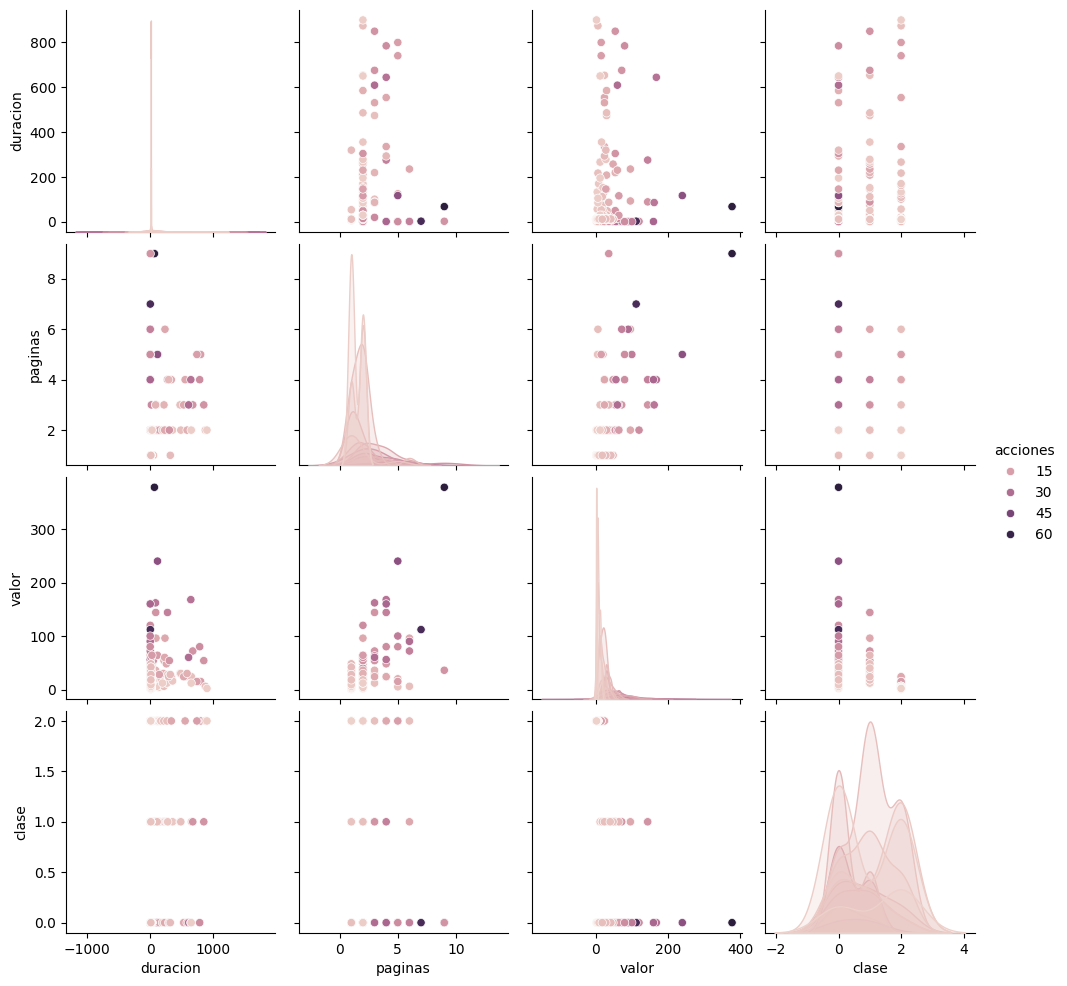

In [15]:
# Relación entre características y la variable objetivo
sns.pairplot(data, hue='acciones')  # Cambia 'target' por el nombre de tu variable objetivo
plt.show()


Dividir los datos en entrenamiento y prueba

In [16]:
# Definir características (X) y variable objetivo (y)
X = data.drop('acciones', axis=1)  # Cambia 'target' por el nombre de tu columna objetivo
y = data['acciones']

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Entrenar el modelo de regresión logística

In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# Crear y entrenar el modelo
model = LogisticRegression(max_iter=1000)
model = make_pipeline(StandardScaler(), LogisticRegression())
model.fit(X_train, y_train)


# Evaluar el modelo en el conjunto de prueba
y_pred = model.predict(X_test)


Evaluar el modelo

🔍 Matriz de confusión:
[[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 4 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]]


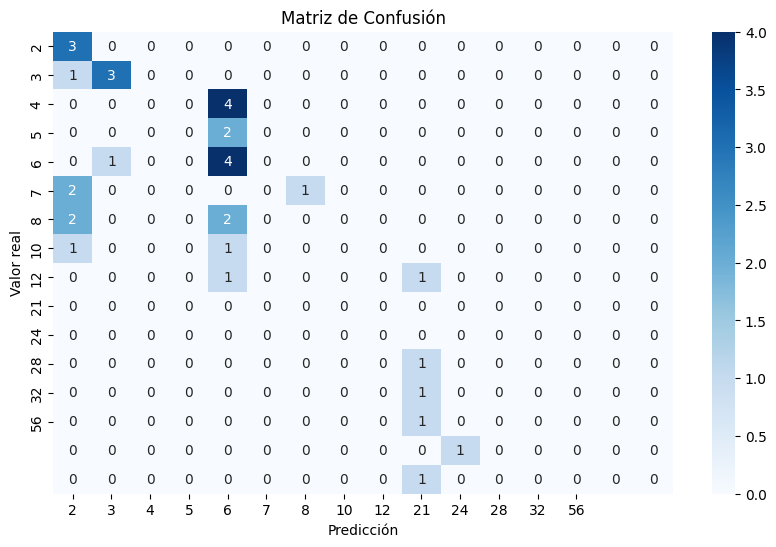


📊 Reporte de clasificación:
              precision    recall  f1-score   support

           2       0.33      1.00      0.50         3
           3       0.75      0.75      0.75         4
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           6       0.29      0.80      0.42         5
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         1
          56       0.00      0.00      0.00         1

    accuracy                           0.29        

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("🔍 Matriz de confusión:")
print(conf_matrix)

# Visualización de la matriz de confusión
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.show()

# Reporte de clasificación con control de división por cero
print("\n📊 Reporte de clasificación:")
print(classification_report(y_test, y_pred, zero_division=0))

# Precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Precisión del modelo: {accuracy:.2f}")



Visualización de resultados

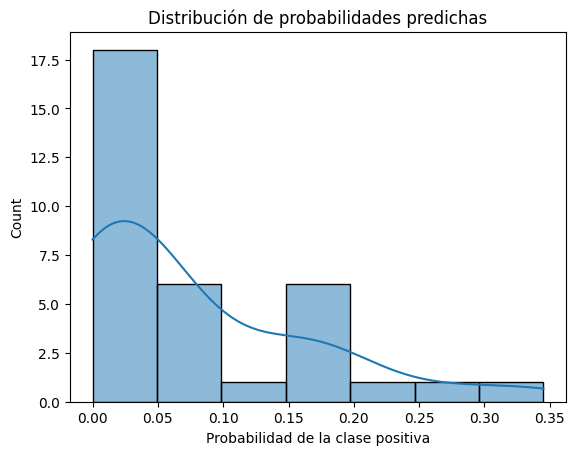

In [22]:
# Visualizar probabilidades predichas
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva
sns.histplot(y_prob, kde=True)
plt.title("Distribución de probabilidades predichas")
plt.xlabel("Probabilidad de la clase positiva")
plt.show()
